In [10]:
import pandas as pd
import numpy as np
import traceback

In [5]:
building=pd.read_csv('C:\\Users\\rabis\\Desktop\\Titanic_ML\\bulding data\\Building_Permits.csv', low_memory=False)

In [6]:
building.head(10)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,NaN,Alpine,Tr,...,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171


In [7]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
Permit Number                             198900 non-null object
Permit Type                               198900 non-null int64
Permit Type Definition                    198900 non-null object
Permit Creation Date                      198900 non-null object
Block                                     198900 non-null object
Lot                                       198900 non-null object
Street Number                             198900 non-null int64
Street Number Suffix                      2216 non-null object
Street Name                               198900 non-null object
Street Suffix                             196132 non-null object
Unit                                      29479 non-null float64
Unit Suffix                               1961 non-null object
Description                               198610 non-null object
Current Status                            198900 n

In [9]:
building['Filed Date'].head()

0    05/06/2015
1    04/19/2016
2    05/27/2016
3    11/07/2016
4    11/28/2016
Name: Filed Date, dtype: object

In [13]:
import time 
import datetime
import seaborn as sns
sns.set_style(style='darkgrid')

In [16]:
dd=pd.read_excel('C:\\Users\\rabis\\Desktop\\Titanic_ML\\bulding data\\DataDictionaryBuildingPermit.xlsx')

In [17]:
dd.head()

,Sl No,Column name,Description
0,1,Permit Number,Number assigned while filing
1,2,Permit Type,Type of the permit represented numerically.
2,3,Permit Type Definition,"Description of the Permit type, for example\n ..."
3,4,Permit Creation Date,"Date on which permit created, later than \nor ..."
4,5,Block,Related to address


In [18]:
dd.sample(5)

,Sl No,Column name,Description
29,30,Proposed Use,Proposed use of the building
16,17,Issued Date,Issued date for the permit
23,24,Fire Only Permit,Fire hazard prevention related permit
27,28,Existing Use,Existing use of the building
9,10,Street Name Suffix,Related to address


In [20]:
import traceback
try:
    building['Filed Date']=pd.to_datetime(building['Filed Date'], errors='coerce')
    building['Issued Date']=pd.to_datetime(building['Issued Date'], errors='coerce')
    building['Current Status Date']=pd.to_datetime(building['Current Status Date'], errors='coerce')
except:
    traceback.print_exc()
    
    

building_copy=building.copy()

In [21]:
building=building_copy.copy()

In [22]:
building=building.rename(columns={'Neighborhoods - Analysis Boundaries':'neighborhoods',
                            'Permit Type' : 'perm_typ',
                            'Permit Type Definition': 'perm_typ_def',
                            'Filed Date':'file_dt',
                            'Issued Date':'issue_dt',
                            'Permit Expiration Date' : 'perm_exp_dt',
                            'Current Status' : 'cur_st',
                            'Current Status Date' : 'cur_st_dt',
                            'Structural Notification':'strct_notif',
                            'Number of Existing Stories':'no_exist_stry',
                            'Number of Proposed Stories':'no_prop_stry',
                            'Fire Only Permit':'fire_only_permit',
                            'Estimated Cost':'est_cost',
                            'Revised Cost':'rev_cost',
                            'Existing Use':'exist_use',
                            'Proposed Use': 'prop_use',
                            'Plansets':'plansets',
                            'Existing Construction Type': 'exist_const_type',
                            'Existing Construction Type Description': 'exist_const_type_descr',
                            'Proposed Construction Type': 'prop_const_type',
                            'Proposed Construction Type Description': 'prop_const_type_descr',
                            'Site Permit':'site_permit',
                            'Supervisor District':'sup_dist','Location':'location'})

In [23]:
building.sample(10)

,Permit Number,perm_typ,perm_typ_def,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,exist_const_type,exist_const_type_descr,prop_const_type,prop_const_type_descr,site_permit,sup_dist,neighborhoods,Zipcode,location,Record ID
92712,201507212005,8,otc alterations permit,07/21/2015,1861B,008A,1582,NaN,16th,Av,...,5.0,wood frame (5),NaN,NaN,NaN,7.0,Inner Sunset,94122.0,"(37.758426468990294, -122.47346648041177)",1389110117664
135969,201609087053,8,otc alterations permit,09/08/2016,0049,001,800,NaN,Chestnut,St,...,1.0,constr type 1,1.0,constr type 1,NaN,2.0,Russian Hill,94133.0,"(37.8037372166303, -122.41719019160328)",143652256688
195226,201801239243,8,otc alterations permit,01/23/2018,3784,080,510,NaN,Townsend,St,...,NaN,NaN,1.0,constr type 1,NaN,6.0,South of Market,94103.0,"(37.773640299305185, -122.40024538316061)",1494438369644
106505,201511193056,8,otc alterations permit,11/19/2015,6444,019,1139,NaN,Athens,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,11.0,Excelsior,94112.0,"(37.71225726268974, -122.43522072148855)",1403904203260
126592,201606089369,8,otc alterations permit,06/08/2016,1737,012,1241,NaN,Funston,Av,...,2.0,constr type 2,2.0,constr type 2,NaN,5.0,Inner Sunset,94122.0,"(37.76490756547621, -122.47099793527758)",1425926244254
149705,201702139308,8,otc alterations permit,02/13/2017,1835,056,1450,NaN,19th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,7.0,Inner Sunset,94122.0,"(37.760750508260976, -122.47656683210826)",1453197491871
56210,201407292456,3,additions alterations or repairs,07/29/2014,2373,015,2371,NaN,44th,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,4.0,Sunset/Parkside,94116.0,"(37.742411558525184, -122.50284446125019)",1350458133154
66131,201410300345,8,otc alterations permit,10/30/2014,6965A,039,44,NaN,Navajo,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,11.0,Outer Mission,94112.0,"(37.720087258620836, -122.44360538163066)",1360860215484
66755,201411060841,8,otc alterations permit,11/06/2014,3648,004,208,NaN,Fair Oaks,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Mission,94110.0,"(37.75310535604875, -122.42440437962236)",1361513475994
63955,201410108634,8,otc alterations permit,10/10/2014,0625C,007,1925,NaN,Gough,St,...,3.0,constr type 3,3.0,constr type 3,NaN,2.0,Pacific Heights,94109.0,"(37.79144259784201, -122.426278185463)",1358562434033


In [24]:
building['Permit Number'].nunique()

181495

In [26]:
building['Record ID'].nunique()

198900

In [27]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
Permit Number                       198900 non-null object
perm_typ                            198900 non-null int64
perm_typ_def                        198900 non-null object
Permit Creation Date                198900 non-null object
Block                               198900 non-null object
Lot                                 198900 non-null object
Street Number                       198900 non-null int64
Street Number Suffix                2216 non-null object
Street Name                         198900 non-null object
Street Suffix                       196132 non-null object
Unit                                29479 non-null float64
Unit Suffix                         1961 non-null object
Description                         198610 non-null object
cur_st                              198900 non-null object
cur_st_dt                           198900 non-null datetime64[ns]
fi

In [28]:
bul=building[['perm_typ','perm_typ_def','file_dt','issue_dt','cur_st','strct_notif','no_exist_stry','no_prop_stry',
          'fire_only_permit','est_cost','rev_cost','exist_use','prop_use','plansets','exist_const_type',
          'prop_const_type','site_permit','location']].copy()

In [29]:
bul[['file_dt', 'issue_dt','perm_typ' ]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 3 columns):
file_dt     198900 non-null datetime64[ns]
issue_dt    183960 non-null datetime64[ns]
perm_typ    198900 non-null int64
dtypes: datetime64[ns](2), int64(1)
memory usage: 4.6 MB


In [30]:
bul=bul.assign(wait_tyme=(bul['issue_dt']-bul['file_dt']).dt.days)

In [31]:
bul['month']=bul['file_dt'].dt.month
bul['year']=bul['file_dt'].dt.year

In [32]:
import matplotlib.pyplot as plt

Text(0.5,1,'Permit count by year')

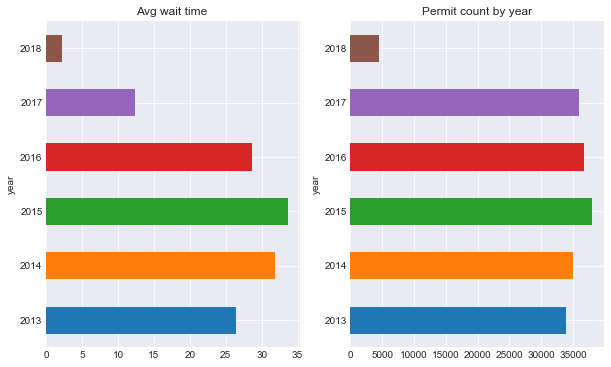

In [36]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
(bul.groupby('year').wait_tyme.mean()).plot.barh()
plt.title("Avg wait time ")
plt.subplot(1,2,2)
(bul.groupby('year').wait_tyme.count()).plot.barh()
plt.title("Permit count by year")

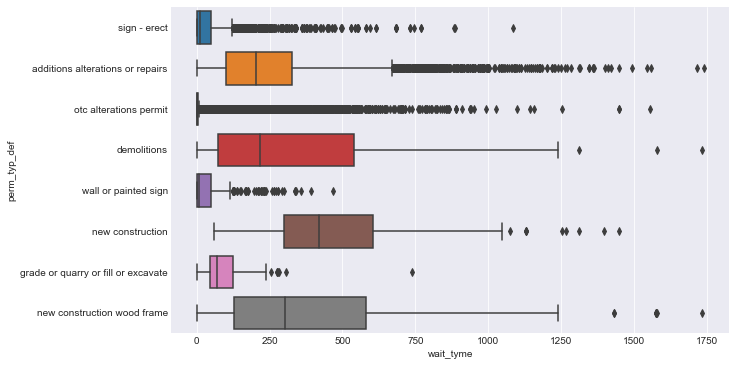

In [39]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(y='perm_typ_def', x='wait_tyme', data=bul, orient='h')
plt.show()